# TP3: Detector de SPAM (16Co2024)

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

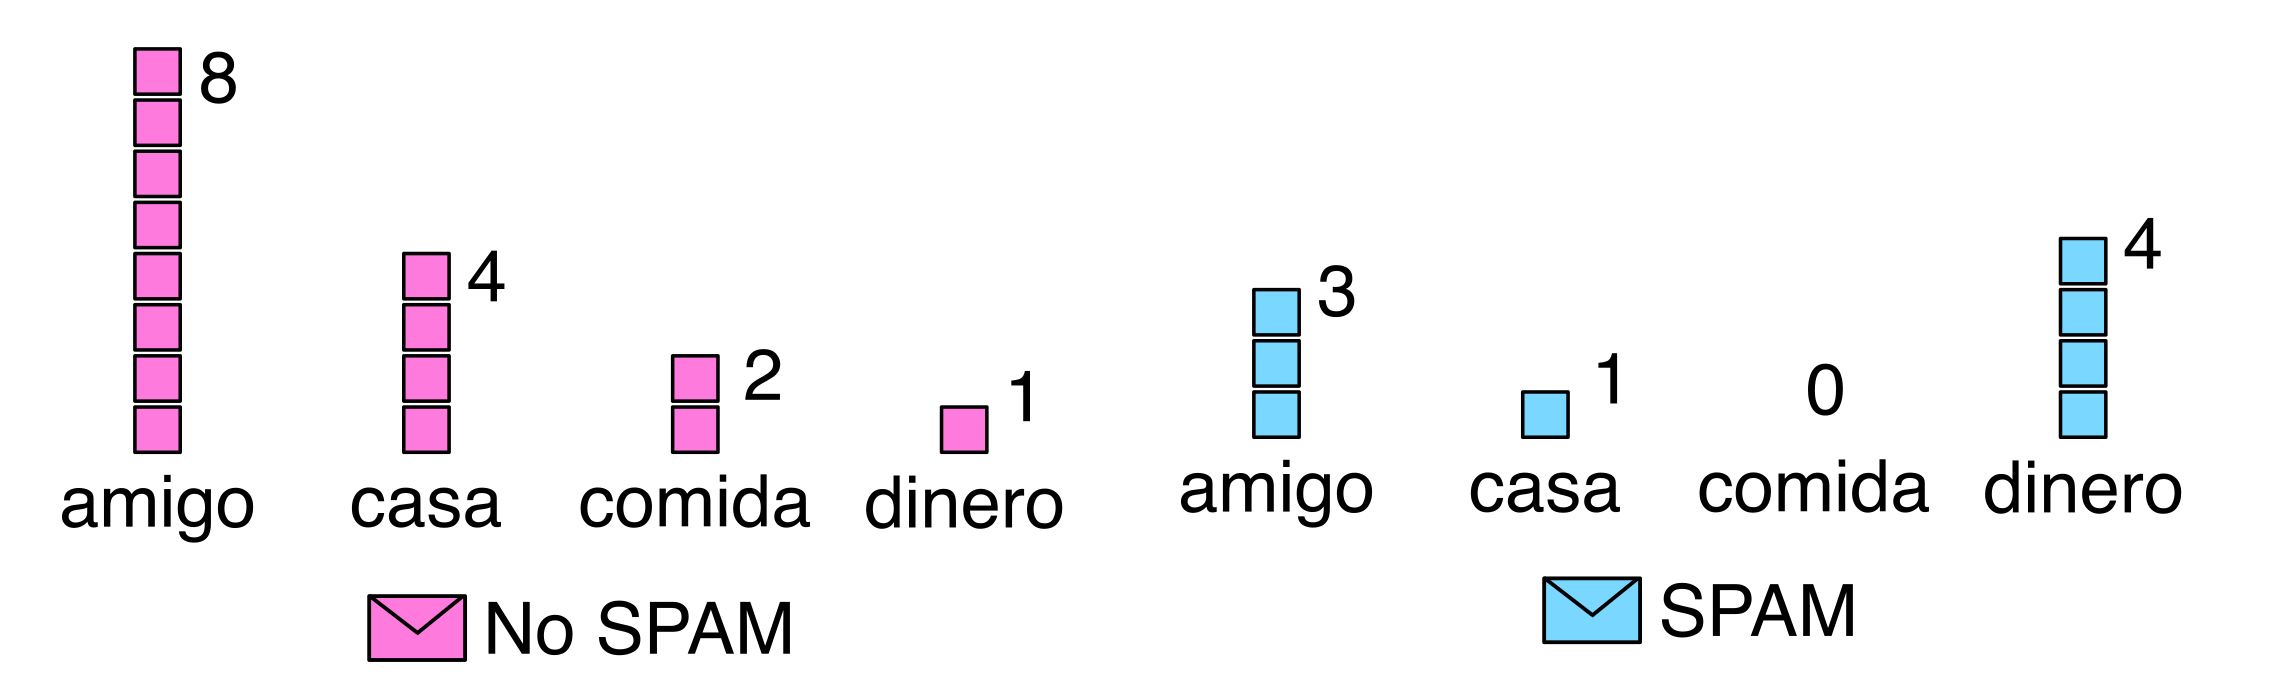

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

**word_freq_XXXX**: Donde XXXX es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada spam, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

Para este trabajo práctico, se proporciona una notebook (ayuda.ipynb) con la lectura del conjunto de datos, la separación de los datos, entre otras ayudas para resolverlo.

### Tareas y preguntas a resolver:

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?
2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).
3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.
4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).
5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?
6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.
7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

El entregable consiste en uno o más archivos de notebook ipynb con las respuestas. Aunque se da libertad para usar otros tipos de entregables, es importante incluir tanto el código de lo resuelto como las respuestas. Pueden subir el contenido o proporcionar un enlace a un repositorio público (GitHub o GitLab) con el contenido. No olviden especificar los autores del TP en el entregable.

# AYUDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
dataset = pd.read_csv("spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


Para obtener las palábras más usadas podemos hacer un groupby:

In [5]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

Y despues se pueden combinar las columnas en usando pd.melt

In [6]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

Se separa el dataset en entrenamiento y evaluación

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

Escalamos para aplicar en regresión logística

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## 1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [9]:
# Obtenemos la suma de frecuencias de palabras para correos SPAM y No SPAM
column_sum_spam = column_sum[column_sum['spam'] == 1]
column_sum_no_spam = column_sum[column_sum['spam'] == 0]

# Eliminamos la columna 'spam' para facilitar el análisis
column_sum_spam = column_sum_spam.drop(columns=['spam'])
column_sum_no_spam = column_sum_no_spam.drop(columns=['spam'])

# Seleccionamos las 10 palabras más comunes en correos SPAM y No SPAM
top_10_spam = column_sum_spam.T.sort_values(by=1, ascending=False).head(10)
top_10_no_spam = column_sum_no_spam.T.sort_values(by=0, ascending=False).head(10)

print("Top 10 palabras en correos SPAM:\n", top_10_spam)
print("\nTop 10 palabras en correos No SPAM:\n", top_10_no_spam)

# Verificamos si hay palabras en común
common_words = top_10_spam.index.intersection(top_10_no_spam.index)
print("\nPalabras en común:\n", common_words)


Top 10 palabras en correos SPAM:
                           1
word_freq_you       4105599
word_freq_your      2502597
word_freq_will       997100
word_freq_free       939790
word_freq_our        931799
char_freq_!          931352
word_freq_all        732080
word_freq_mail       635470
word_freq_email      578759
word_freq_business   521250

Top 10 palabras en correos No SPAM:
                          0
word_freq_you      3541702
word_freq_george   3527559
word_freq_hp       2496576
word_freq_will     1495268
word_freq_your     1223098
word_freq_hpl      1204398
word_freq_re       1159138
word_freq_edu       800669
word_freq_address   681569
word_freq_meeting   604460

Palabras en común:
 Index(['word_freq_you', 'word_freq_your', 'word_freq_will'], dtype='object')


#### Análisis

Es interesante notar que las palabras "you", "your" y "will" aparecen con alta frecuencia tanto en correos SPAM como en correos No SPAM. Esto sugiere que estas palabras son comunes en la comunicación por correo electrónico en general, independientemente de si el correo es SPAM o no. Sin embargo, palabras como "free", "our", "mail", "email" y "business" son más indicativas de correos SPAM, mientras que palabras como "george", "hp", "hpl", "re", "edu", "address" y "meeting" son más comunes en correos legítimos. La frecuencia alta del carácter "!" en correos SPAM también es notable, ya que es común que los correos SPAM utilicen puntuación excesiva para llamar la atención.

## 2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [10]:
# Ya hemos separado el conjunto de datos en el código de ayuda proporcionado
# A continuación, se muestra nuevamente para referencia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [11]:
# Entrenamos el clasificador de Bayes ingenuo en la seccion de ayuda
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
y_pred_nb = nb_classifier.predict(X_test)


## 4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [12]:
# Ya hemos escalado los datos en el código de ayuda proporcionado en la seccion de ayuda
# Entrenamos el clasificador de Regresión Logística
log_reg_classifier = LogisticRegression(max_iter=1000)
log_reg_classifier.fit(X_train_scaled, y_train)

# Predecimos con el conjunto de prueba escalado
y_pred_lr = log_reg_classifier.predict(X_test_scaled)


## 5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

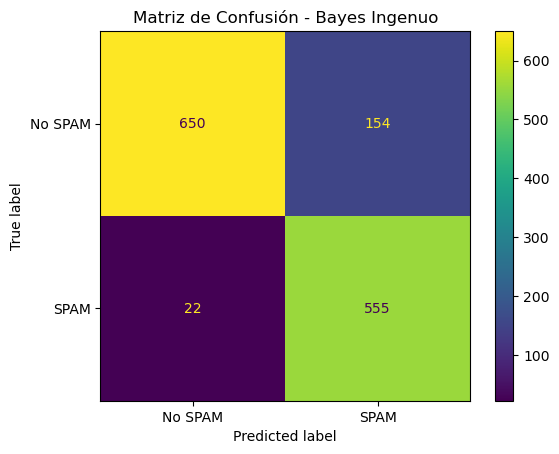

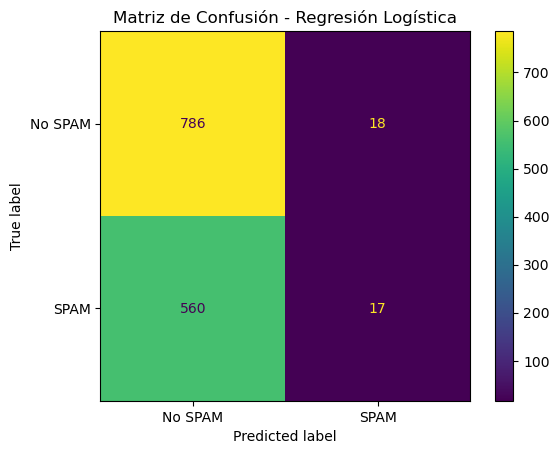

In [13]:
# Calculamos la matriz de confusión para el clasificador de Bayes ingenuo
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=["No SPAM", "SPAM"])
disp_nb.plot()
plt.title("Matriz de Confusión - Bayes Ingenuo")
plt.show()

# Calculamos la matriz de confusión para el clasificador de Regresión Logística
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No SPAM", "SPAM"])
disp_lr.plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


#### Análisis de Errores

- **Clasificador Bayes Ingenuo:**
  - Falsos Positivos (Predice SPAM, pero es No SPAM): 154
  - Falsos Negativos (Predice No SPAM, pero es SPAM): 22

- **Clasificador de Regresión Logística:**
  - Falsos Positivos (Predice SPAM, pero es No SPAM): 18
  - Falsos Negativos (Predice No SPAM, pero es SPAM): 560

#### ¿Qué tipo de error comete más cada modelo?
El clasificador de Bayes Ingenuo comete más errores de Falsos Positivos (154), mientras que el clasificador de Regresión Logística comete más errores de Falsos Negativos (560).

#### ¿Cuál de los dos tipos de error crees que es más importante para este problema?
Para la detección de SPAM, es generalmente más crítico evitar los Falsos Negativos (predicciones incorrectas de No SPAM cuando el correo es realmente SPAM) porque los correos SPAM que no se detectan pueden llegar a la bandeja de entrada del usuario, lo cual es indeseable. En este contexto, el clasificador de Bayes Ingenuo parece ser mejor, ya que tiene un número significativamente menor de Falsos Negativos (22) comparado con el clasificador de Regresión Logística (560).

Sin embargo, también es importante considerar los Falsos Positivos, ya que demasiados correos legítimos marcados como SPAM pueden causar inconvenientes a los usuarios. En resumen, ambos tipos de errores son importantes, pero la minimización de Falsos Negativos suele ser prioritaria en la detección de SPAM.

## 6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [14]:
# Calculamos precisión y recuperación para el clasificador de Bayes ingenuo
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
print(f"Precisión Bayes Ingenuo: {precision_nb}")
print(f"Recuperación Bayes Ingenuo: {recall_nb}")

# Calculamos precisión y recuperación para el clasificador de Regresión Logística
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Precisión Regresión Logística: {precision_lr}")
print(f"Recuperación Regresión Logística: {recall_lr}")


Precisión Bayes Ingenuo: 0.7827926657263752
Recuperación Bayes Ingenuo: 0.9618717504332756
Precisión Regresión Logística: 0.4857142857142857
Recuperación Regresión Logística: 0.029462738301559793



#### Resultados

- **Clasificador Bayes Ingenuo:**
  - Precisión: 0.7828
  - Recuperación: 0.9619

- **Clasificador de Regresión Logística:**
  - Precisión: 0.4857
  - Recuperación: 0.0295

#### Análisis

La **precisión** mide la proporción de verdaderos positivos sobre el total de predicciones positivas. En otras palabras, indica qué tan frecuentemente el modelo está en lo correcto cuando predice que un correo es SPAM.

La **recuperación** (o sensibilidad) mide la proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Esto indica qué tan bien el modelo es capaz de identificar correos SPAM verdaderos.

#### ¿Cuál es el mejor modelo?

Comparando ambos modelos:
- **Bayes Ingenuo** tiene una precisión de 0.7828 y una recuperación de 0.9619.
- **Regresión Logística** tiene una precisión de 0.4857 y una recuperación de 0.0295.

Claramente, el clasificador de Bayes Ingenuo supera al de Regresión Logística tanto en precisión como en recuperación.

#### Relación de las métricas con los tipos de errores

En la tarea 5, observamos que el clasificador de Bayes Ingenuo tiene menos falsos negativos comparado con la Regresión Logística. Esto se refleja en su alta recuperación (0.9619), lo que significa que es muy efectivo en identificar correos SPAM. 

Por otro lado, la Regresión Logística tiene una recuperación extremadamente baja (0.0295), indicando que falla en identificar la mayoría de los correos SPAM (muchos falsos negativos). Además, su precisión también es baja (0.4857), lo que sugiere que comete muchos falsos positivos.

Para el problema de detección de SPAM, minimizar los falsos negativos es crucial porque los correos SPAM no detectados pueden llegar a la bandeja de entrada del usuario, lo que es indeseable. El clasificador de Bayes Ingenuo, con su alta recuperación, minimiza este riesgo mejor que la Regresión Logística.

Aunque la precisión también es importante (para reducir falsos positivos), en este caso, la diferencia en recuperación es tan significativa que hace que el **clasificador de Bayes Ingenuo** sea claramente superior para este problema específico.


## 7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

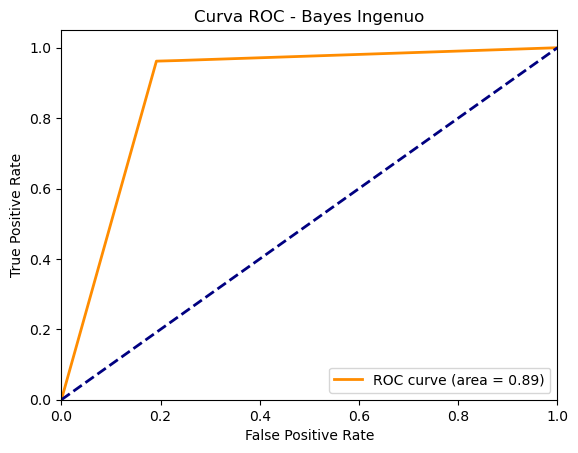

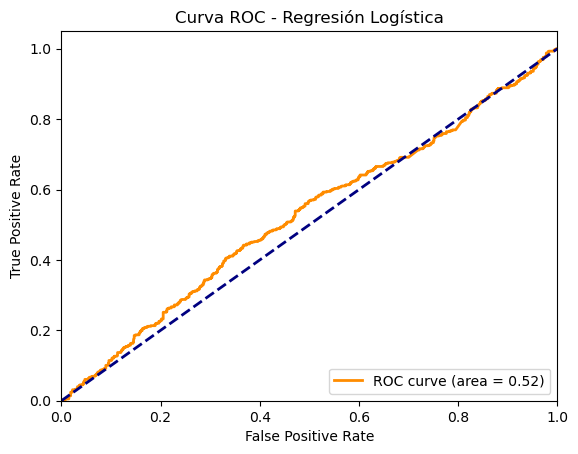

In [15]:
from sklearn.metrics import roc_curve, auc

# Curva ROC y AUC para el clasificador de Bayes ingenuo
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Bayes Ingenuo')
plt.legend(loc="lower right")
plt.show()

# Curva ROC y AUC para el clasificador de Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()


En estas curvas ROC, se puede ver que el area bajo al curva del clasificador de bayes ingenue es mucho mas eficiente que el de la regresión logistica.

#### Clasificador de Bayes Ingenuo

El clasificador de Bayes ingenuo se basa en el teorema de Bayes con la suposición de independencia condicional entre las características. Esto significa que, dado el estado de la clase, cada característica es independiente de las demás. 

Las suposiciones del clasificador de Bayes ingenuo son simplificadoras pero funcionan sorprendentemente bien en muchos problemas prácticos, incluyendo la detección de SPAM. Las razones incluyen:

- **Eficiencia Computacional**: El clasificador de Bayes ingenuo es computacionalmente eficiente debido a su simplicidad matemática.
- **Eficiencia en Datos Desbalanceados**: En problemas de detección de SPAM, los datos suelen estar desbalanceados. El clasificador de Bayes ingenuo maneja bien este desbalance al calcular probabilidades a partir de frecuencias de características.
- **Rendimiento Robustecido con Pocas Muestras**: Funciona bien incluso con conjuntos de datos relativamente pequeños, porque la estimación de probabilidades a partir de frecuencias de características puede ser robusta.

#### Regresión Logística

La regresión logística, por otro lado, modela la probabilidad de una clase como una función logística de una combinación lineal de características

Las suposiciones y características clave de la regresión logística incluyen:

- **Dependencia Lineal**: Supone una relación lineal entre las características y el logaritmo de las probabilidades. Esto puede ser una limitación si las relaciones entre las características y la clase no son lineales.
- **Sensibilidad a Multicolinealidad**: Puede ser sensible a la multicolinealidad (correlación entre características), lo que puede afectar la estabilidad y interpretabilidad del modelo.
- **Necesidad de Escalamiento**: Requiere que las características sean escaladas para un rendimiento óptimo, lo cual puede ser una desventaja en términos de preprocesamiento adicional.

#### Por qué el Clasificador de Bayes Ingenuo Funciona Mejor en Este Caso

En el caso de detección de SPAM, las características (frecuencias de palabras) pueden estar fuertemente correlacionadas y no linealmente relacionadas con la clase objetivo. La suposición de independencia condicional del clasificador de Bayes ingenuo puede ser una ventaja aquí, ya que simplifica la estimación de probabilidades sin requerir una modelización lineal o considerar la correlación entre características.

Además, el conjunto de datos puede tener características que son muy informativas por sí solas (por ejemplo, palabras clave que son fuertes indicadores de SPAM). El clasificador de Bayes ingenuo puede aprovechar estas características individualmente, mientras que la regresión logística intenta ajustar una combinación lineal de todas las características, lo cual puede no ser tan efectivo si las relaciones son no lineales o complejas.

Por lo tanto, el clasificador de Bayes ingenuo puede superar a la regresión logística en este caso debido a su capacidad para manejar características independientes y su simplicidad en la modelización de relaciones probabilísticas directas, lo que resulta en un mejor rendimiento en la tarea de detección de SPAM.

